In [673]:
#imorting the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
np.random.seed(0)
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Loading the data 

In [674]:
#loading the dataset
housing = load_boston()

In [675]:
#creating dataframe
data = pd.DataFrame(housing.data)
#put the feature names in dataframe
data.columns = housing.feature_names
# adding a column to data frame
data['MEDV'] = housing.target


In [676]:
#missing data checking
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [677]:
#rows with missing data
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


#### Inspect our data 

C:\ProgramData\Anaconda3\envs\my_tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


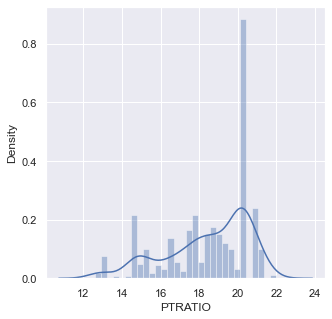

In [678]:
#check the distribution
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['PTRATIO'], bins=30)
plt.show()

In [679]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x000001B5E8EF4EE0> (for post_execute):


KeyboardInterrupt: 

In [680]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

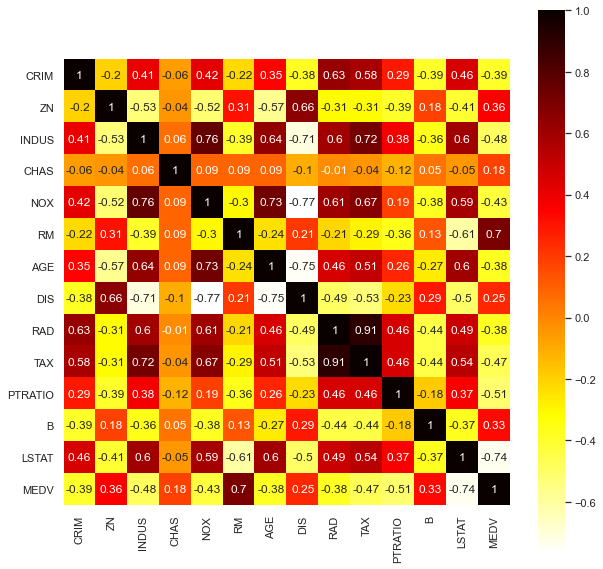

In [681]:
correlation = data.corr().round(2)
#heatmap plot - correlation between attributes 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap='hot_r')

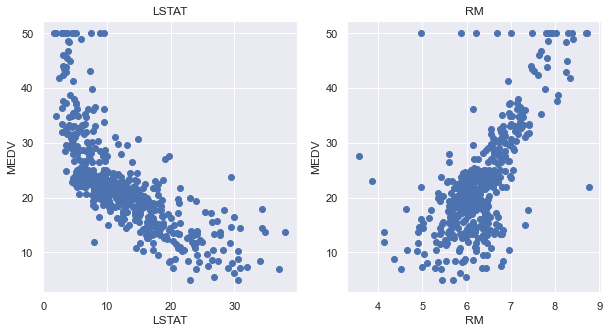

In [682]:
plt.figure(figsize=(10, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [695]:
###########CHECKING THE MODEL WITH ALL THE FEATURES

#X = data.drop('MEDV', axis=1)
#Y = data['MEDV']

In [696]:
###########CHECKING THE MODEL WITH RM, LSTAT, PTRATIO, TAX

#X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['PTRATIO'], data['TAX']]
#                 , columns=['LSTAT','RM', 'PTRATIO', 'TAX'])
#Y = data['MEDV']

In [697]:
###################CHECKING THE MODEL WITH RM AND LSTAT

#concatenating RM and LSTAT as the 2 most effective features
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']]
                 , columns=['LSTAT','RM'])
Y = data['MEDV']

In [787]:
#splitting the dataset to test and training 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=10)
print(X_test.shape)
print(Y_train.shape)

(102, 2)
(404,)


In [788]:
#create linear regressor
lr = LinearRegression(normalize=True)
#training the model 
model = lr.fit(X_train, Y_train)

In [789]:
# y intercept
model.intercept_

3.1448715410669017

In [790]:
########## fitting model on test dataset##########

# Model test_prediction on test data
test_prediction = model.predict(X_test)

In [791]:
########## fitting model on train dataset##########

# Model test_prediction on test data
train_prediction = model.predict(X_train)

In [792]:

####### Model Evaluation on test dataset
test_r_2 = metrics.r2_score(Y_test, test_prediction)
test_mean_abs_err = metrics.mean_absolute_error(Y_test, test_prediction)
test_mean_sqrd_err = metrics.mean_squared_error(Y_test, test_prediction)
test_sqrt_mean_sqrd_err = np.sqrt(test_mean_sqrd_err)

In [793]:

####### Model Evaluation on train dataset
train_r_2 = metrics.r2_score(Y_train, train_prediction)
train_mean_abs_err = metrics.mean_absolute_error(Y_train, train_prediction)
train_mean_sqrd_err = metrics.mean_squared_error(Y_train, train_prediction)
train_sqrt_mean_sqrd_err = np.sqrt(train_mean_sqrd_err)

In [794]:
print('Model performance on test dataset')
print('R^2 test =',test_r_2)
print('MAE test =',test_mean_abs_err)
print('MSE test =',test_mean_sqrd_err)
print('RMSE test =',test_sqrt_mean_sqrd_err)
print('=============================================')
print('Model performance on train dataset')
print('R^2 train =',train_r_2)
print('MAE train =',train_mean_abs_err)
print('MSE train =',train_mean_sqrd_err)
print('RMSE train =',train_sqrt_mean_sqrd_err)

Model performance on test dataset
R^2 test = 0.6041142735229121
MAE test = 4.582645892343417
MSE test = 41.40202341152381
RMSE test = 6.434440411684905
Model performance on train dataset
R^2 train = 0.6363353379616082
MAE train = 3.7980634226890113
MSE train = 27.98794118547948
RMSE train = 5.2903630485515345


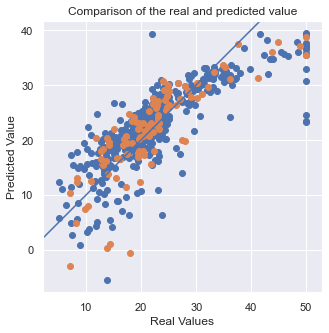

In [778]:
# Visualizing the differences between actual prices and predicted values (test) and (train)
plt.subplot()
plt.scatter(Y_train, train_prediction, marker='o')
plt.scatter(Y_test, test_prediction)
plt.title('Comparison of the real and predicted value')
plt.xlabel('Real Values')
plt.ylabel('Predicted Value')

plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])
